<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
Dataset Info:
 None

Dataset Description:
         customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000

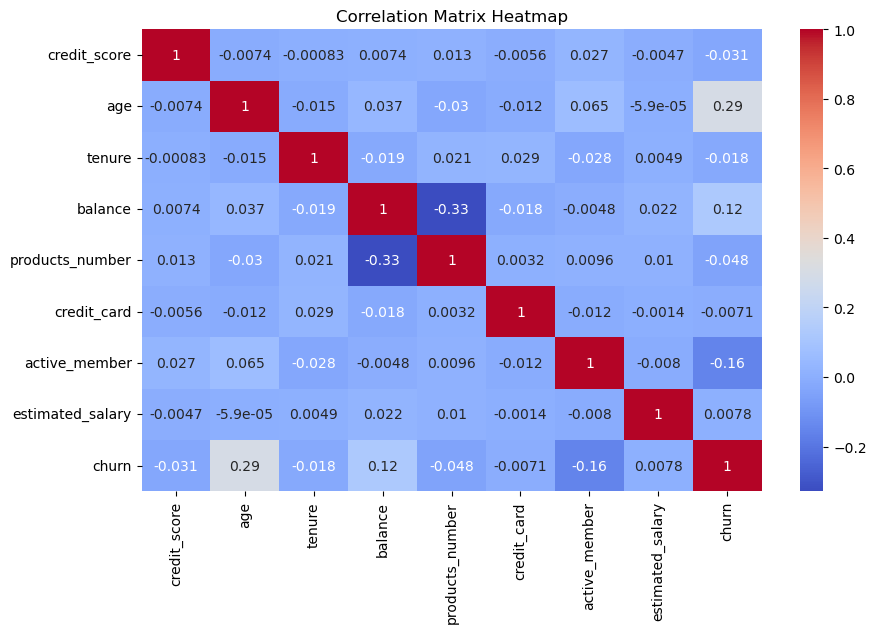

Mulivalue Variables:       credit_score       age    tenure   balance  products_number  \
0         0.642408  0.514281  0.458157  0.000000         0.000000   
1         0.622195  0.499465  0.289065  0.911805         0.000000   
2         0.406271  0.514281  0.916314  0.963645         0.666667   
3         0.779442  0.468744  0.289065  0.000000         0.333333   
4         1.000000  0.528757  0.458157  0.944288         0.000000   
...            ...       ...       ...       ...              ...   
9995      0.889990  0.468744  0.747222  0.000000         0.333333   
9996      0.437269  0.402403  1.000000  0.881321         0.000000   
9997      0.795459  0.419655  0.867194  0.000000         0.000000   
9998      0.891452  0.514281  0.578130  0.902955         0.333333   
9999      0.920295  0.266256  0.671188  0.947203         0.000000   

      credit_card  active_member  estimated_salary  
0             1.0            1.0          0.929738  
1             0.0            1.0          0.

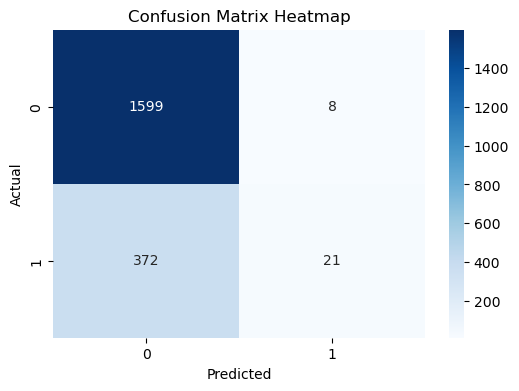

<Figure size 600x400 with 0 Axes>

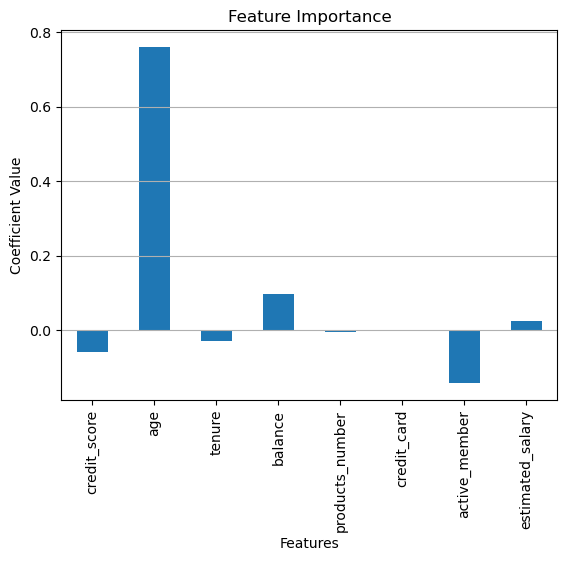

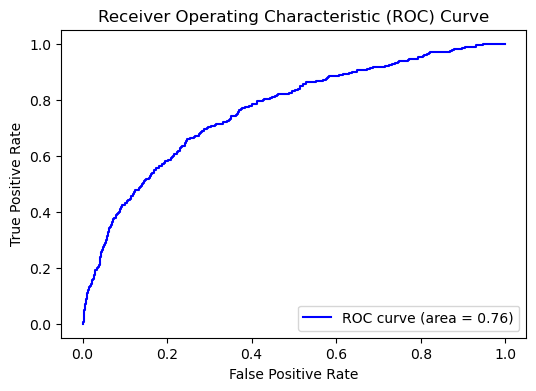

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
# Load dataset
file_path = "~/Downloads/Bank Customer Churn Prediction.csv"  # Update to churn dataset for logarithmic
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Info:\n", df.info())
print("\nDataset Description:\n", df.describe())
print("\nData Types:\n", df.dtypes)

# Preprocessing Section and handle missing values
print("\nChecking for missing values:\n", df.isnull().sum())

# Drop categorical columns
df.drop(columns=['customer_id', 'country', 'gender'], inplace=True, errors='ignore')
df = df.apply(pd.to_numeric)
df.dropna(inplace=True)
continuous_columns = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
df[continuous_columns] = np.log1p(df[continuous_columns])


# Correlation Matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# Generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


# Normalize Data with the minmax scaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Split Data
X = df_scaled.iloc[:, :-1]  # Independent variables
y = df_scaled.iloc[:, -1]   # Dependent variable (Churn Prediction)

print("Mulivalue Variables:",X)
print("Dependent variable:",y.name)
print(y)


# Conduct and Train 
model = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20 percent in training here
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
print("Prediction:", y_pred)


# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, np.round(y_pred))
print("\nConfusion Matrix:\n", conf_matrix)

# Evaluate the model
accuracy = accuracy_score(y_test, np.round(y_pred))
report = classification_report(y_test, np.round(y_pred))
cross_val = cross_val_score(model, X, y, cv=5).mean()

print("Accuracy Score:", accuracy)
print("Classification Report:\n", report)
print("Cross-Validation Score:", cross_val)


# Plotting graphs
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Bar Chart to illuistrate the importance a variable is to sales by coefficenient value
### Just like the heatmap, age is what impacts churn
plt.figure(figsize=(6,4))
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.plot(kind='bar', legend=False)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.grid(axis="y")
plt.show()

## ROC Curve
### Another graph i found interesting and relevant to the true positive rate.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
